In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
iris = load_iris()
clf = tree.DecisionTreeClassifier()#定义决策树
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.25,random_state=0)#分割训练和测试数据集
clf = clf.fit(x_train, y_train)

In [2]:
#打印在测试集上的指标
from sklearn.metrics import accuracy_score,precision_score,recall_score
def print_clf_metrics(y_true, y_pred):
    acc=accuracy_score(y_true,y_pred)
    pre=precision_score(y_true,y_pred,average=None)
    recall=recall_score(y_true,y_pred,average=None)
    print('accuracy:{:.2f}%'.format(100*acc))
    print('precision:{}%'.format(np.round(100*pre,2)))
    print('recall:{}%'.format(np.round(100*recall,2)))
print_clf_metrics(y_test,clf.predict(x_test))

accuracy:97.37%
precision:[100. 100.  90.]%
recall:[100.    93.75 100.  ]%


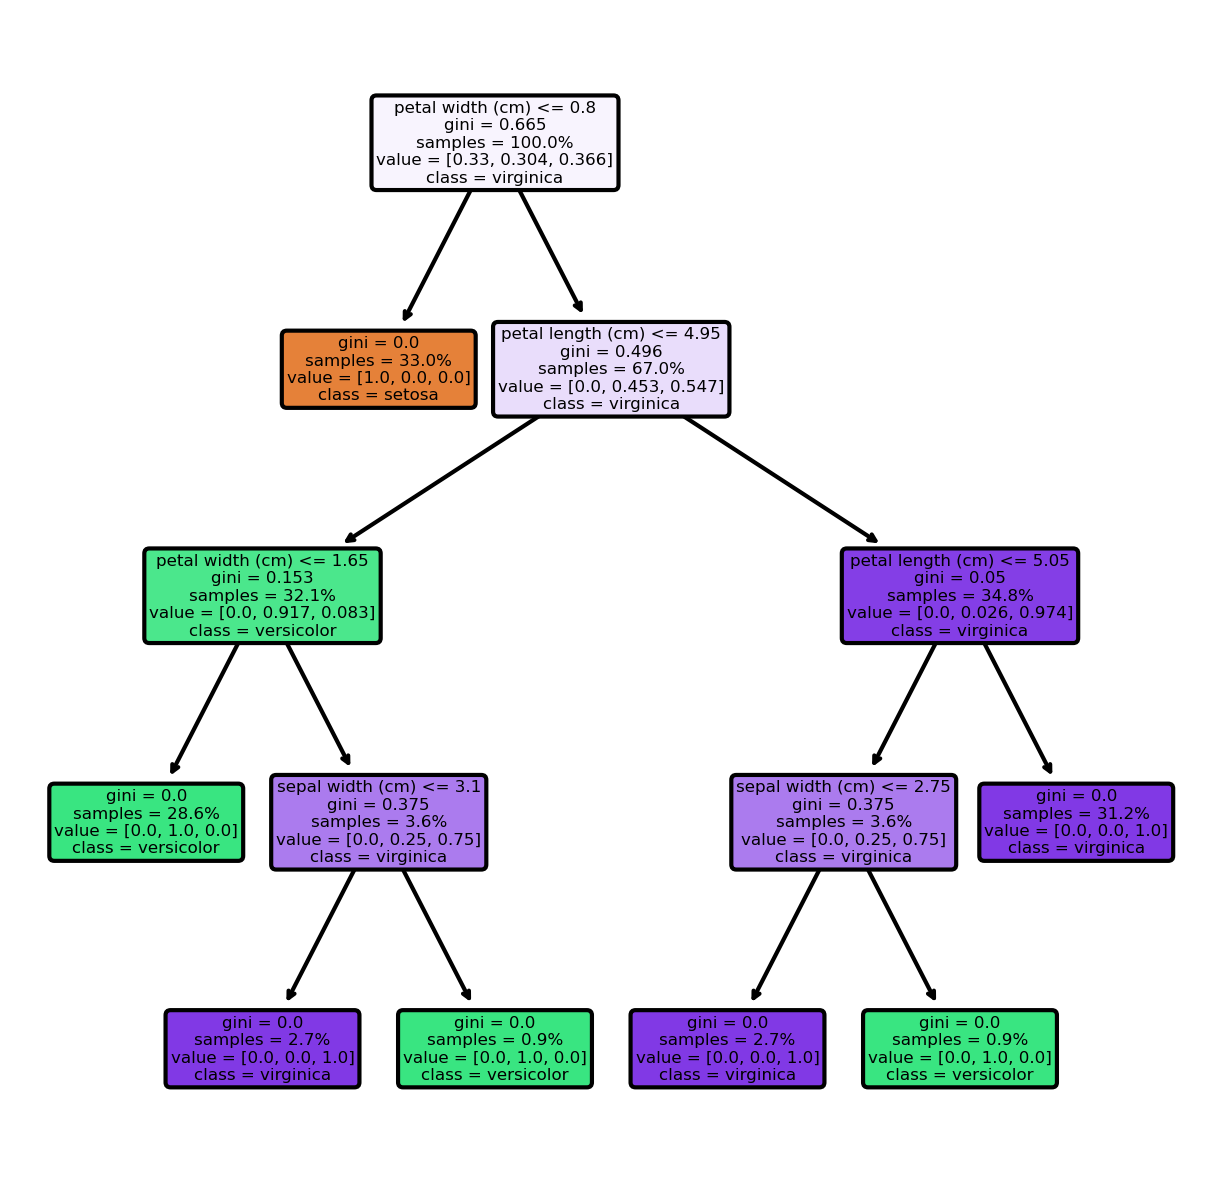

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure(dpi=300,figsize=(5,5))
ax=fig.add_subplot(111)
_=tree.plot_tree(clf,ax=ax,filled=True,rounded=True,proportion=True,\
                 feature_names=iris.feature_names,class_names=iris.target_names,fontsize=4)